<a href="https://colab.research.google.com/github/KC-Night/wrangling_assignment/blob/main/wrangling_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Q1:1


In [ ]:
df_air = pd.read_csv('airbnb_hw.csv')
df_air.head()

In [ ]:
df_air['Price'].value_counts()
print(df_air['Price'].unique(),'\n')

before = df_air['Price'].notna().sum() #30478


df_air['Price'] = pd.to_numeric(df_air['Price'], errors='coerce') #Convert to numeric to get rid of commas
print(df_air['Price'].unique(),'\n')
df_air['Price'].tail()


after= df_air['Price'].notna().sum() #30297

before - after #181 missing values

Q1:2

In [ ]:
df_police=pd.read_csv('mn_police_use_of_force.csv')
df_police.head()

In [ ]:
print(df_police['subject_injury'].unique(),'\n')
print(df_police['subject_injury'].value_counts(dropna=False), '\n') #9848 NaN
df_police_new= df_police.dropna(subset=['subject_injury']) #Get rid of rows with NA
print(df_police_new['subject_injury'].unique(),'\n')
df_police_new['subject_injury'].value_counts() #Missing 9848 values, 76% of the values

In [ ]:
pd.crosstab(df_police['subject_injury'], df_police['force_type'], dropna=False)

In [ ]:
pd.crosstab(df_police_new['subject_injury'], df_police['force_type'], dropna=False)
#Missing data tends to occur during force types that only require the body, or with a less lethal method, such as a chemical irritant

Q1:3


In [ ]:
df = pd.read_parquet('justice_data.parquet')
df.head()

In [ ]:
print(df.dtypes)
print(df.shape)
print(df.columns,'\n')

In [73]:
#Clean 'WhetherDefendantWasReleasedPretrial", replace missing values with np.nan
df = df.rename(columns={'WhetherDefendantWasReleasedPretrial':'ReleasedPretrial'}) #Rename column

In [ ]:
df["ReleasedPretrial"].head()
df["ReleasedPretrial"].value_counts()
print(df['ReleasedPretrial'].unique(),'\n')
df['ReleasedPretrial'] = pd.to_numeric(df['ReleasedPretrial'], errors='coerce')
df['ReleasedPretrial']= df['ReleasedPretrial'].replace(0,np.nan)
df['ReleasedPretrial'] = df['ReleasedPretrial'].astype('Int64')
df["ReleasedPretrial"].head()

Q1:4

In [75]:
df = df.rename(columns={'ImposedSentenceAllChargeInContactEvent':'ImposedSentence'}) #Rename column

In [87]:
df["ImposedSentence"].head()


#df["ImposedSentence"] = pd.to_numeric(df["ImposedSentence"], errors='coerce') #Change values to numeric, replace missing values with 0
#df["ImposedSentence"].head()
#df["ImposedSentence"].isna().sum()
#df["ImposedSentence"].value_counts()
#df['ImposedSentence']= df['ImposedSentence'].replace(0,np.nan) #Replace 0's with np.nan
#df["ImposedSentence"].head()
#df["ImposedSentence"] = np.ceil(df["ImposedSentence"]) #Round up decimal values
#df["ImposedSentence"].head()
#df["ImposedSentence"] = df["ImposedSentence"].astype("Int64") #Convert to integer
#df["ImposedSentence"].head()
print(df['ImposedSentence'].unique(),'\n')

<IntegerArray>
[<NA>,   60,   12,    1,   36,    6,   24,  120,   72,    3,
 ...
  163,  165,  175,  181,  232,  152,  167,  193,  960,  116]
Length: 235, dtype: Int64 



In [77]:
df['SentenceTypeAllChargesAtConvictionInContactEvent'] .head()

,SentenceTypeAllChargesAtConvictionInContactEvent
0,9
1,0
2,1
3,1
4,4


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Q2:1

In [78]:
df1= pd.read_excel('GSAF5.xls')
df1.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Q2:2

In [79]:
list = ["pdf", "href", "href formula", "original order", "Unnamed: 22", "Case Number", "Case Number.1", "Unnamed: 21"]
new_df1 = df1.drop(list, axis=1)
print( new_df1.columns, '\n', new_df1.shape)
new_df1.head()

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object') 
 (7042, 15)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post


Q2:3

In [80]:
new_df1['Year'].head()
print(new_df1['Year'].value_counts(), '\n') #Values have a very large range, with some years that don't seem quite feasible
conditional = (new_df1['Year'] >= 1940) & (new_df1['Year'] <= 2026)
df_time = new_df1[conditional]
df_time.head()

Year
2015.0    143
2017.0    141
2016.0    133
0.0       129
2011.0    128
         ... 
1723.0      1
1721.0      1
1703.0      1
5.0         1
2026.0      1
Name: count, Length: 261, dtype: int64 



,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post


Q2:4

['nan' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' '35' '58' '24' '55'
 '17' '36' '23' '28' '48' '60+' '57' '61' '27' '38' '68' '33' '15' '41'
 '43' nan '49' '25' '46' '65' '64' '13' '11' '32' '10' '62' '22' '52' '44'
 '47' '59' '8' '50' '34' '30s' '20/30' '20s' '77' '60' '!2' '73' '50s'
 '67' '6' '53' '51' '31' '40s' '!6' '71' '54' '75' '45 and 15' '70' '4'
 '28 & 22' '22, 57, 31' '60s' "20's" '74' '9 & 60' '3' '82' '40?' '72'
 '18 months' '28 & 26' '5' '86' '18 or 20' '12 or 13' '46 & 34'
 '28, 23 & 30' '36 & 26' '8 or 10' '84' '' '30 or 36' '6½' '21 & ?'
 '33 or 37' 'mid-30s' '23 & 20' '7      &    31' '20?' "60's" '32 & 30'
 '16 to 18' '87' 'Elderly' 'mid-20s' 'Ca. 33' '21 or 26' '>50' '18 to 22'
 'adult' '9 & 12' '? & 19' '9 months' '25 to 35' '23 & 26' '1' '(adult)'
 '33 & 37' '25 or 28' '37, 67, 35, 27,  ? & 27' '21, 34,24 & 35' '30 & 32'
 '50 & 30' '17 & 35' '"middle-age"' '13 or 18' '34 & 19' '33 & 26

/tmp/ipython-input-4123010461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Age']= df_time['Age'].replace('?',np.nan)
/tmp/ipython-input-4123010461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Age']= df_time['Age'].astype(str).str.strip()
/tmp/ipython-input-4123010461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<Axes: >

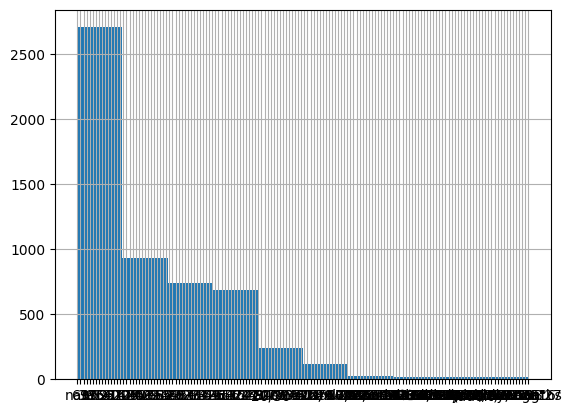

In [81]:
df_time['Age']= df_time['Age'].replace('?',np.nan)
df_time['Age'].head()
df_time['Age']= df_time['Age'].astype(str).str.strip()
df_time['Age']= df_time["Age"].replace({
    '\xa0': np.nan,
    'MAKE LINE GREEN': np.nan,
    'X': np.nan,
    '!!': np.nan,
    'M': np.nan,
    'F': np.nan,
    'Middle age': np.nan,
    'teen' : np.nan,
    'Teen' : np.nan,
    'a minor': np.nan,
    'Teens' : np.nan
})
print(df_time['Age'].unique(), '\n')
df_time['Age_nan'] = df_time['Age'].isnull()
print('\n', df_time['Age'].describe(),'\n')
print('Total Missings: \n', sum(df_time['Age_nan']),'\n')
df_time['Age'].hist()